## Coursera IBM Data Science Course Cap Stone Project 

### Dr. V.Venkat Ramayya

### Recommender System for the amenities in HiTech City in Hyderabad

#### Install required packages

In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


####  Read geoJSON file  

In [4]:
!wget --quiet labs/DP0701EN/amenity_points.geojson

In [5]:
with open('amenity_points.geojson') as json_data:
    hitech_data = json.load(json_data)

In [6]:
hitech_data

{'type': 'FeatureCollection',
 'name': 'amenity_points',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'osm_id': 6574136929,
    'shop': 'furniture',
    'brand': 'IKEA',
    'name': 'IKEA',
    'man_made': None,
    'amenity': None,
    'highway': None,
    'operator': None,
    'leisure': None,
    'tourism': None,
    'sport': None,
    'addr:housename': None,
    'addr:housenumber': None,
    'place': None,
    'office': None,
    'brand:wikidata': 'Q54078',
    'brand:wikipedia': 'en:IKEA',
    'cuisine': None,
    'name:te': None,
    'payment:debit_cards': None,
    'addr:city': None,
    'payment:coins': None,
    'addr:postcode': None,
    'addr:suburb': None,
    'payment:credit_cards': None,
    'payment:cash': None,
    'opening_hours': None,
    'addr:street': None,
    'wheelchair': None,
    'atm': None,
    'level': None,
    'addr:full': None,
    'addr:district': None,
    'addr

In [23]:
latitude  = 17.4515
longitude = 78.3778

#### Study amenities in the study area  

In [9]:
import json

with open("amenity_points.geojson") as f:
    data = json.load(f)

for feature in data['features']:
    print(feature['properties']['amenity'])   

None
None
place_of_worship
None
parking
fast_food
ice_cream
cafe
cafe
bank
cafe
restaurant
None
atm
fuel
restaurant
fast_food
atm
restaurant
None
college
None
None
fast_food
bank
None
cafe
hospital
hospital
hospital
fast_food
None
pharmacy
None
pharmacy
atm
None
None
None
fast_food
None
restaurant
restaurant
None
None
None
None
restaurant
restaurant
None
None
None
None
None
restaurant
dentist
bank
toilets
None
None
None
restaurant
None
restaurant
None
bank
bench
bank
restaurant
atm
atm
cafe
None
bank
pharmacy
hospital
restaurant
bank
swimming_pool
restaurant
restaurant
restaurant
bank
bank
None
None
hospital
bank
police
restaurant
None
restaurant
restaurant
restaurant
bank
cafe
None
police
place_of_worship
None
None
atm
None
None
None
fast_food
fast_food
bureau_de_change
bank
fast_food
clinic
pharmacy
restaurant
fuel
None
None
fast_food
restaurant
restaurant
school
None
post_office
restaurant
bank
None
fast_food
pharmacy
pharmacy
atm
None
None
cafe
school
restaurant
dentist
None
restau

In [10]:
# define the dataframe columns
column_names = ['osm_id', 'name', 'amenity','Latitude', 'Longitude'] 
# instantiate the dataframe
locations = pd.DataFrame(columns=column_names)

In [11]:
locations.head()

,osm_id,name,amenity,Latitude,Longitude


In [12]:
locations_data = hitech_data['features']

In [13]:
locations_data[0]

{'type': 'Feature',
 'properties': {'osm_id': 6574136929,
  'shop': 'furniture',
  'brand': 'IKEA',
  'name': 'IKEA',
  'man_made': None,
  'amenity': None,
  'highway': None,
  'operator': None,
  'leisure': None,
  'tourism': None,
  'sport': None,
  'addr:housename': None,
  'addr:housenumber': None,
  'place': None,
  'office': None,
  'brand:wikidata': 'Q54078',
  'brand:wikipedia': 'en:IKEA',
  'cuisine': None,
  'name:te': None,
  'payment:debit_cards': None,
  'addr:city': None,
  'payment:coins': None,
  'addr:postcode': None,
  'addr:suburb': None,
  'payment:credit_cards': None,
  'payment:cash': None,
  'opening_hours': None,
  'addr:street': None,
  'wheelchair': None,
  'atm': None,
  'level': None,
  'addr:full': None,
  'addr:district': None,
  'addr:state': None,
  'website': None,
  'operator:type': None,
  'contact:phone': None,
  'phone': None,
  'name:en': None,
  'toilets': None,
  'toilets:access': None,
  'takeaway': None,
  'internet_access:fee': None,
  'inter

In [14]:
#for feature in data['features']:
for data in locations_data:
    name  = locations_name = data['properties']['name'] 
    locations_osmid = data['properties']['osm_id']
    locations_name = data['properties']['name']
    locations_amenity = data['properties']['amenity']
    locations_latlon = data['geometry']['coordinates']
    locations_lat = locations_latlon[1]
    locations_lon = locations_latlon[0]
    locations = locations.append({'osm_id': locations_osmid,
                                          'name': locations_name,
                                           'amenity': locations_amenity,                        
                                          'Latitude': locations_lat,
                                          'Longitude': locations_lon}, ignore_index=True)

In [15]:
locations.shape

(287, 5)

In [16]:
locations.head()

,osm_id,name,amenity,Latitude,Longitude
0,6574136929,IKEA,None,17.439238,78.375390
1,2713944084,over head water tank,None,17.442588,78.371619
2,4931853973,Hexagon,place_of_worship,17.443600,78.373899
3,655159152,Mindspace,None,17.441420,78.376985
4,893955535,TCS parking,parking,17.442682,78.378129


In [17]:
locations.to_csv('newlocations.csv')

#### Edit the data for missing values manually


In [18]:
!wget --quiet labs/DP0701EN/edited locations.csv

In [19]:
locations = pd.read_csv("edited locations.csv")

In [20]:
locations.shape

(221, 5)

In [24]:
locations.to_csv('test.csv')

In [25]:
map_hitech = folium.Map(location=[latitude, longitude], zoom_start=20)
map_hitech

#### Plot the amenities in the HiTech City

In [26]:
map_hitech = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, osm_id, name, amenity in zip(locations['Latitude'], locations['Longitude'], locations['osm_id'],locations['name'], locations['amenity']):
    label = '{} - {}'.format(name, amenity)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hitech)  
    
map_hitech

#### Four Square Credentials

In [27]:
CLIENT_ID = 'Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA' # your Foursquare ID
CLIENT_SECRET = 'FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA
CLIENT_SECRET:FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ


#### Shilpa Kala vedika in HiTech city has been chosen to explore neighbourhoods

In [28]:
locations.loc[162, 'name']

'Shilpa Kala Vedika'

In [29]:
neighborhood_latitude = locations.loc[162, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = locations.loc[162, 'Longitude'] # neighborhood longitude value

neighborhood_name = locations.loc[162, 'name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
         
                                                               neighborhood_longitude))

Latitude and longitude values of Shilpa Kala Vedika are 17.4513921, 78.37928829999998.


In [30]:
Latitude =  neighborhood_latitude
Longitude = neighborhood_longitude

#### Foursqaure Call for getting info about the nearby neighbourhoods

In [31]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ&v=20180604&ll=17.4513921,78.37928829999998&radius=500&limit=100'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5db05d986e4650002c26c417'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 17.455892104500006,
    'lng': 78.38399661828475},
   'sw': {'lat': 17.446892095499994, 'lng': 78.37457998171521}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '515e95b2e4b09c02ea4522b7',
       'name': 'Trident',
       'location': {'address': 'Hitech City Main Road',
        'crossStreet': 'Next To Shilparamam',
        'lat': 17.44941554032092,
        'lng': 78.37874222070519,
        'labeledLatLngs': [{'label': 'displa

In [33]:
import csv

In [34]:
f = open("dict.txt","w")
f.write( str(results) )
f.close()

In [35]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()
nearby_venues.shape

(26, 4)

In [37]:
nearby_venues.to_csv('nearby_venues.csv')

In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'id', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [40]:
# type your answer here
neighbourhood_venues = getNearbyVenues(names=locations['name'],
                                   latitudes=locations['Latitude'],
                                   longitudes=locations['Longitude']
                                  )                       


IKEA
Hexagon
Mindspace
TCS parking
Domino's Pizza
Quality walls
Starbucks
Cafe Coffee Day
State Bank of India
Dunkin' Donuts
Melting pot
Thick Shake
nan
Indian Oil
Telahu
Food Republic
Eat Central
Reliance Fresh
Sri venkateshwara group of if colleges
Krish's Fitness
Jockey
Keshav Reddy Sweets
Indian Bank
Ratnadeep Supermarket
Minevera Coffee Shop
Srija Maternity and Nusing Home
Image Hospitals
OAKRIDGE HOSPITALS
Hot Chips
Apollo Pharmacy
Sree Ganesh Watch Co
Esskay Medicals
IDBI Bank
Vodafone Store
Om Sai Ram Nice Vada Pav
Apple Homes Guest Housr
Pan Shop
Spicy Hub
EzyStay
Swan Suites
Gold's Gym
Heritage Fresh Store
karachi bakery
Olive Garden
IPhix
Pride Honda
Madhapur Image Gardens
Madhapur Image Gardens
Gifts Galore
Appetito
Partha Dental
Lakshmi Vilas Bank
Mirrors Saloons and Academy
Mobile Care
Titan eyeplus
Pizza Hut
Om Sai
Eat Country Style
Avvari
Federal Bank
Oriental Bank Of Commerce
Abhiruchi Restaurant
Cafe Coffee Day
Jawed Habib
Vijaya Bank
pharmacy
Vikram Hospitals
Hotel T

In [36]:
print(neighbourhood_venues.shape)
neighbourhood_venues.head()

(5175, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,IKEA,17.439238,78.37539,Republic of Noodles,4f89a0b3e4b039b1453f557f,17.442831,78.376914,Asian Restaurant
1,IKEA,17.439238,78.37539,IKEA Hyderabad,57ac118c38fa8f9b5d45395f,17.438940,78.375823,Furniture / Home Store
2,IKEA,17.439238,78.37539,Red Fox Hotel,4e63f252091afcffd9d9de02,17.443244,78.376338,Asian Restaurant
3,IKEA,17.439238,78.37539,Lemon Tree Hotel,4d6dcd43619a236ad8606a8f,17.443275,78.376898,Hotel
4,IKEA,17.439238,78.37539,Paradise,5a6c262cc5309373244cbdcc,17.441355,78.376380,Indian Restaurant


In [41]:
neighbourhood_venues.to_csv('neighbourhood_venues.csv')

In [42]:
not_assigned = 'None'
neighbourhood_venues.drop(neighbourhood_venues[neighbourhood_venues['Neighborhood'] == not_assigned].index, inplace = True) 

In [43]:
neighbourhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
32 Happy Teeth Dental clinic,35,35,35,35,35,35,35
4 Seasons,20,20,20,20,20,20,20
@home,29,29,29,29,29,29,29
Aadi Raghavendra Udupi Veg,35,35,35,35,35,35,35
Abhiruchi Restaurant,30,30,30,30,30,30,30
Absolute Barbecues (ABs),29,29,29,29,29,29,29
Ahilobhilam Foods,11,11,11,11,11,11,11
Andhra Bank,23,23,23,23,23,23,23
Anjaneya swami temple,29,29,29,29,29,29,29


In [58]:
print('There are {} unique categories.'.format(len(neighbourhood_venues['Venue Category'].unique())))

There are 73 unique categories.


In [44]:
# one hot encoding
neighbourhood_onehot = pd.get_dummies(neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbourhood_onehot['Neighborhood'] = neighbourhood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [neighbourhood_onehot.columns[-1]] + list(neighbourhood_onehot.columns[:-1])
neighbourhood_onehot= neighbourhood_onehot[fixed_columns]

neighbourhood_onehot.head()

,Neighborhood,Afghan Restaurant,Andhra Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hookah Bar,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,Multiplex,Nightclub,Office,Outdoors & Recreation,Pizza Place,Pub,Punjabi Restaurant,Recreation Center,Restaurant,Sandwich Place,Shopping Mall,Snack Place,South Indian Restaurant,Spa,Sports Bar,Tennis Court,Vegetarian / Vegan Restaurant,Volleyball Court,Wings Joint,Yoga Studio
0,IKEA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IKEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,IKEA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,IKEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IKEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
neighbourhood_grouped = neighbourhood_onehot.groupby('Neighborhood').mean().reset_index()
neighbourhood_grouped

,Neighborhood,Afghan Restaurant,Andhra Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Hookah Bar,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Multicuisine Indian Restaurant,Multiplex,Nightclub,Office,Outdoors & Recreation,Pizza Place,Pub,Punjabi Restaurant,Recreation Center,Restaurant,Sandwich Place,Shopping Mall,Snack Place,South Indian Restaurant,Spa,Sports Bar,Tennis Court,Vegetarian / Vegan Restaurant,Volleyball Court,Wings Joint,Yoga Studio
0,32 Happy Teeth Dental clinic,0.028571,0.028571,0.000000,0.057143,0.000000,0.028571,0.085714,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.000000,0.000000,0.114286,0.057143,0.028571,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.000000,0.028571,0.00,0.028571,0.000000,0.000000,0.000000
1,4 Seasons,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.000000,0.100000,0.050000,0.050000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.000000,0.000000,0.000000
2,@home,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.068966,0.00000,0.000000,0.000000,0.137931,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.103448,0.034483,0.000000,0.000000,0.034483,0.000000,0.034483,0.00,0.000000,0.000000,0.000000,0.000000
3,Aadi Raghavendra Udupi Veg,0.028571,0.028571,0.000000,0.057143,0.000000,0.028571,0.085714,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.000000,0.000000,0.114286,0.057143,0.028571,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.000000,0.028571,0.00,0.028571,0.000000,0.000000,0.000000
4,Abhiruchi Restaurant,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.166667,0.066667,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.

#### Explore top 5 Venues in each neighbourhood

In [46]:
num_top_venues = 5

for hood in neighbourhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighbourhood_grouped[neighbourhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----32 Happy Teeth Dental clinic----
                venue  freq
0   Indian Restaurant  0.14
1                Café  0.11
2              Bakery  0.09
3  Chinese Restaurant  0.06
4    Asian Restaurant  0.06


----4 Seasons----
                  venue  freq
0                  Café  0.15
1     Indian Restaurant  0.15
2  Fast Food Restaurant  0.10
3       Bed & Breakfast  0.05
4                   Gym  0.05


----@home----
                  venue  freq
0     Indian Restaurant  0.14
1  Fast Food Restaurant  0.10
2            Restaurant  0.10
3                 Hotel  0.07
4    Chinese Restaurant  0.07


----Aadi Raghavendra Udupi Veg----
                venue  freq
0   Indian Restaurant  0.14
1                Café  0.11
2              Bakery  0.09
3  Chinese Restaurant  0.06
4    Asian Restaurant  0.06


----Abhiruchi Restaurant----
                venue  freq
0                Café  0.17
1   Indian Restaurant  0.07
2  Chinese Restaurant  0.07
3               Hotel  0.03
4   Andhra Restaurant  

#### 74 Venues with their frequency of visit

In [49]:
temp.head()

,venue,freq
1,Afghan Restaurant,0.00
2,Andhra Restaurant,0.04
3,Arts & Crafts Store,0.00
4,Asian Restaurant,0.07
5,Athletics & Sports,0.00


In [50]:
temp.shape

(73, 2)

#### Lets identify top 10 venues in each of the Neighbourhoods

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighbourhood_grouped['Neighborhood']

for ind in np.arange(neighbourhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighbourhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32 Happy Teeth Dental clinic,Indian Restaurant,Café,Bakery,Asian Restaurant,Chinese Restaurant,Afghan Restaurant,Outdoors & Recreation,Fast Food Restaurant,Electronics Store,Department Store
1,4 Seasons,Café,Indian Restaurant,Fast Food Restaurant,Department Store,Nightclub,Dumpling Restaurant,Bed & Breakfast,Sandwich Place,Restaurant,Food Court
2,@home,Indian Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Hotel,Punjabi Restaurant,Italian Restaurant,Market,Mexican Restaurant,Concert Hall
3,Aadi Raghavendra Udupi Veg,Indian Restaurant,Café,Bakery,Asian Restaurant,Chinese Restaurant,Afghan Restaurant,Outdoors & Recreation,Fast Food Restaurant,Electronics Store,Department Store
4,Abhiruchi Restaurant,Café,Chinese Restaurant,Indian Restaurant,Afghan Restaurant,Pub,Coffee Shop,Juice Bar,Clothing Store,Mediterranean Restaurant,Department Store


In [53]:
neighborhoods_venues_sorted.shape

(204, 11)

In [54]:
neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv')

In [55]:
neighborhoods_venues_sorted1 = neighborhoods_venues_sorted

### Clustering of Neighbourhoods

In [56]:
# set number of clusters
kclusters = 5

neighbourhood_grouped_clustering = neighbourhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbourhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 4, 3, 0, 3], dtype=int32)

In [57]:
# add clustering labels
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32 Happy Teeth Dental clinic,Indian Restaurant,Café,Bakery,Asian Restaurant,Chinese Restaurant,Afghan Restaurant,Outdoors & Recreation,Fast Food Restaurant,Electronics Store,Department Store
1,4 Seasons,Café,Indian Restaurant,Fast Food Restaurant,Department Store,Nightclub,Dumpling Restaurant,Bed & Breakfast,Sandwich Place,Restaurant,Food Court
2,@home,Indian Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Hotel,Punjabi Restaurant,Italian Restaurant,Market,Mexican Restaurant,Concert Hall
3,Aadi Raghavendra Udupi Veg,Indian Restaurant,Café,Bakery,Asian Restaurant,Chinese Restaurant,Afghan Restaurant,Outdoors & Recreation,Fast Food Restaurant,Electronics Store,Department Store
4,Abhiruchi Restaurant,Café,Chinese Restaurant,Indian Restaurant,Afghan Restaurant,Pub,Coffee Shop,Juice Bar,Clothing Store,Mediterranean Restaurant,Department Store


del neighborhoods_venues_sorted['Cluster Labels2']
del neighborhoods_venues_sorted['Cluster Labels1']

In [58]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
locations_merged = locations
locations_merged = locations_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='name')

In [59]:
locations_merged.head() 

,osm_id,name,amenity,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6574136929,IKEA,Furniture Mall,17.439238,78.375390,3.0,Asian Restaurant,Furniture / Home Store,Hotel,Café,Indian Restaurant,Yoga Studio,Dumpling Restaurant,Dance Studio,Department Store,Dessert Shop
1,4931853973,Hexagon,place_of_worship,17.443600,78.373899,3.0,Indian Restaurant,Café,Asian Restaurant,Bakery,Clothing Store,Hotel,Coffee Shop,Office,Ice Cream Shop,IT Services
2,655159152,Mindspace,commercial_parks,17.441420,78.376984,3.0,Indian Restaurant,Asian Restaurant,Café,Pizza Place,Coffee Shop,Gym,Furniture / Home Store,Lounge,Hotel,Sandwich Place
3,893955535,TCS parking,parking,17.442682,78.378129,0.0,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Hotel,Furniture / Home Store,Sandwich Place,Lounge,Pizza Place,Ice Cream Shop
4,5515637838,Domino's Pizza,fast_food,17.441306,78.380863,2.0,Indian Restaurant,Café,Hotel,Restaurant,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Sandwich Place


In [60]:
locations_merged = locations_merged.astype({"Cluster Labels": int}, errors = 'ignore')

In [61]:
locations_merged.shape

(221, 16)

In [62]:
locations_merged.head()

,osm_id,name,amenity,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6574136929,IKEA,Furniture Mall,17.439238,78.375390,3.0,Asian Restaurant,Furniture / Home Store,Hotel,Café,Indian Restaurant,Yoga Studio,Dumpling Restaurant,Dance Studio,Department Store,Dessert Shop
1,4931853973,Hexagon,place_of_worship,17.443600,78.373899,3.0,Indian Restaurant,Café,Asian Restaurant,Bakery,Clothing Store,Hotel,Coffee Shop,Office,Ice Cream Shop,IT Services
2,655159152,Mindspace,commercial_parks,17.441420,78.376984,3.0,Indian Restaurant,Asian Restaurant,Café,Pizza Place,Coffee Shop,Gym,Furniture / Home Store,Lounge,Hotel,Sandwich Place
3,893955535,TCS parking,parking,17.442682,78.378129,0.0,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Hotel,Furniture / Home Store,Sandwich Place,Lounge,Pizza Place,Ice Cream Shop
4,5515637838,Domino's Pizza,fast_food,17.441306,78.380863,2.0,Indian Restaurant,Café,Hotel,Restaurant,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Sandwich Place


locations_merged['Cluster Labels']

In [63]:
locations_merged = locations_merged.drop(12, axis = 'rows') 

In [64]:
locations_merged.to_csv('locations_merged.csv')

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(locations_merged['Latitude'], locations_merged['Longitude'], locations_merged['name'], locations_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
temp1 = temp

In [67]:
df_f = temp1[temp1['freq'] >= 0.005]

In [68]:
df_f

,venue,freq
2,Andhra Restaurant,0.04
4,Asian Restaurant,0.07
6,BBQ Joint,0.04
7,Bakery,0.04
8,Bar,0.04
11,Breakfast Spot,0.04
16,Café,0.11
17,Chinese Restaurant,0.04
23,Department Store,0.04
24,Dessert Shop,0.04


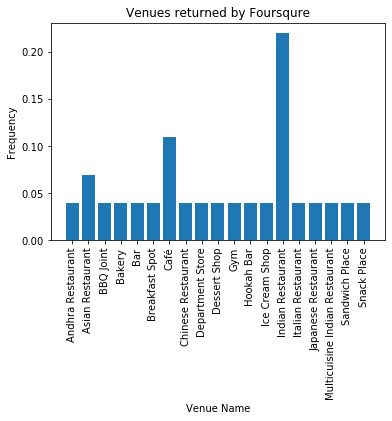

In [105]:
import matplotlib.pyplot as plt
x = df_f['venue']
y = df_f['freq']
plt.bar(x,y)
plt.title('Venues returned by Foursqure')
plt.xlabel('Venue Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.savefig('Venues Visited with Frequesncy.png')
#plt.xticks([i + 0.5 for i, _ in enumerate(locations_merged['name'])], locations_merged['name'])
plt.show()

#### Explore the ratings, tip count and other statistics of the Venue Category Restaurants in the HiTech city .


In [70]:
neighbourhood_venues['COUNTER'] =1       #initially, set that counter to 1.
group_data = neighbourhood_venues.groupby(['Venue Category','Venue'])['COUNTER'].sum() #sum function
print(group_data)
f = open("dict_grouped_data.csv","w")
f.write( str(group_data) )
f.close()

Venue Category                  Venue                                 
Afghan Restaurant               Yum Yum Tree                               79
Andhra Restaurant               Ahobilam Foods- An Organic Cave            12
                                Frydayz                                    65
                                T-grill                                    28
Arts & Crafts Store             Shilparamam                                26
Asian Restaurant                Kritunga Restaurent                        43
                                Mamagoto                                   15
                                Red Fox Hotel                              11
                                Republic of Noodles                        16
                                Sameplace                                  48
                                Taste                                      17
Athletics & Sports              The Street                             

#### It is proposed to make premium calls for the types 'restaurant'  to get relevant statistics

In [71]:
pip install xlrd

     |████████████████████████████████| 112kB 42.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [72]:
!wget --quiet labs/DP0701EN/Filtered_Venues_for_premuim_calls.xlsx

In [73]:
import pandas as pd
df2 = pd.read_excel ('Filtered_Venues_for_premuim_calls.xlsx') 
df2

,Venue,Venue_Id,Latitude,Longitude,Venue_category,Count
0,Yum Yum Tree,57cb1d68498e6143845f2578,17.442511,78.387811,Afghan Restaurant,79
1,Frydayz,55bba4a1498e64e8224f92db,17.446905,78.384575,Andhra Restaurant,65
2,Ohm @ Avasa,5082ba6ee4b052212e3f084b,17.447151,78.383876,Chinese Restaurant,66
3,Grill inn,5242dbf811d29c8abee9a339,17.441417,78.388642,Fast Food Restaurant,59
4,The Alley,57409046cd105b73f6c23cbe,17.442142,78.384640,Food Court,65
5,Hyderabad House,4c7e617f18bc199c8966de58,17.441248,78.390330,Indian Restaurant,51
6,Punjabi Affair,4fe817aee4b0b484a53a40e3,17.442575,78.388124,Indian Restaurant,79
7,Swaad,515934dbe4b03f6bcab013c0,17.445638,78.386782,Indian Restaurant,70
8,Little Italy,50446161e4b08d95c2c673a3,17.448345,78.378862,Italian Restaurant,31
9,Ci Gusta,5385efc5498e95906611fb32,17.438342,78.395606,Italian Restaurant,35


In [74]:
s = pd.Series(df2['Venue_Id'])
for i in s:
    print(i)

57cb1d68498e6143845f2578
55bba4a1498e64e8224f92db
5082ba6ee4b052212e3f084b
5242dbf811d29c8abee9a339
57409046cd105b73f6c23cbe
4c7e617f18bc199c8966de58
4fe817aee4b0b484a53a40e3
515934dbe4b03f6bcab013c0
50446161e4b08d95c2c673a3
5385efc5498e95906611fb32
594404f9c21cb15461284b12
599d399c270ee762c0234df3
50c2f996e4b092542be78aa2
4f0524ed61af9d3db8897c26


In [75]:
count=0
url = {}
for i in s:  
    url[count] = 'https://api.foursquare.com/v2/venues/'+i+'?client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,LIMIT)
    print(url[count]) 
    count = count +1    

https://api.foursquare.com/v2/venues/57cb1d68498e6143845f2578?client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ&v=20180604&limit=100
https://api.foursquare.com/v2/venues/55bba4a1498e64e8224f92db?client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ&v=20180604&limit=100
https://api.foursquare.com/v2/venues/5082ba6ee4b052212e3f084b?client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ&v=20180604&limit=100
https://api.foursquare.com/v2/venues/5242dbf811d29c8abee9a339?client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAWUUQ&v=20180604&limit=100
https://api.foursquare.com/v2/venues/57409046cd105b73f6c23cbe?client_id=Q3URCS2BD2PFNXWI0MXU11VJYGBLE4YHWRSGGT5CSMFYTIFA&client_secret=FGOTFCCSIJUQPYVJ0NEVENU0GTBN4RBCE2RVV2Z5JTJAW

In [76]:
results_premium = {}
count= 0
for i in url.values():
    results_premium[count] = requests.get(i).json()
    count = count+1    

In [77]:
df_prem = pd.DataFrame( columns = ['venue_name','venue_category', 'Venue_id', 'Tip_count','Likes','Price','rating' ], index=None)
df_prem

,venue_name,venue_category,Venue_id,Tip_count,Likes,Price,rating


In [78]:
for i in results_premium:
        venue_name = results_premium[i]['response']['venue']['name']
        venue_cate= results_premium[i]['response']['venue']['categories'][0]['name']  # for vene name
        id = results_premium[i]['response']['venue']['categories'][0]['id']  # for vene id
        tipcount =results_premium[i]['response']['venue']['stats']['tipCount']   # for tip count
        likes = results_premium[i]['response']['venue']['likes']['count'] # venue likes count
        if i!=1 and  i!=4:
            price = results_premium[i]['response']['venue']['price']['message']  # price range not there for 1 4 
        if i!=1 and  i!=4 and i!=10:
            rating = results_premium[i]['response']['venue']['rating'] # venue rating   not there for 1 4  10
        df_prem=df_prem.append(pd.Series([venue_name,venue_cate,id,tipcount,likes,price,rating],index=df_prem.columns ), ignore_index=True)


In [79]:
df_prem

,venue_name,venue_category,Venue_id,Tip_count,Likes,Price,rating
0,Yum Yum Tree,Afghan Restaurant,503288ae91d4c4b30a586d67,1,9,Moderate,7.6
1,Frydayz,Andhra Restaurant,54135bf5e4b08f3d2429dfe5,0,0,Moderate,7.6
2,Ohm @ Avasa,Chinese Restaurant,4bf58dd8d48988d145941735,3,10,Cheap,7.8
3,Grill inn,Fast Food Restaurant,4bf58dd8d48988d16e941735,4,5,Cheap,6.3
4,The Alley,Food Court,4bf58dd8d48988d120951735,3,5,Cheap,6.3
5,Hyderabad House,Indian Restaurant,4bf58dd8d48988d10f941735,4,3,Moderate,5.9
6,Punjabi Affair,Indian Restaurant,4bf58dd8d48988d10f941735,13,27,Moderate,7.3
7,Swaad,Indian Restaurant,4bf58dd8d48988d10f941735,5,8,Moderate,6.1
8,Little Italy,Italian Restaurant,4bf58dd8d48988d110941735,13,28,Moderate,6.4
9,Ci Gusta,Italian Restaurant,4bf58dd8d48988d110941735,8,17,Moderate,7.5


In [80]:
df_prem.to_csv('df_prem.csv')

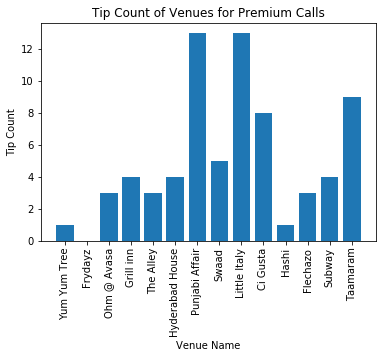

In [81]:
import matplotlib.pyplot as plt
x = df_prem['venue_name']
y = df_prem['Tip_count']
plt.bar(x,y)
plt.title('Tip Count of Venues for Premium Calls')
plt.xlabel('Venue Name')
plt.ylabel('Tip Count')
plt.xticks(rotation=90)

plt.savefig('Tip Count.png')
#plt.xticks([i + 0.5 for i, _ in enumerate(locations_merged['name'])], locations_merged['name'])
plt.show()

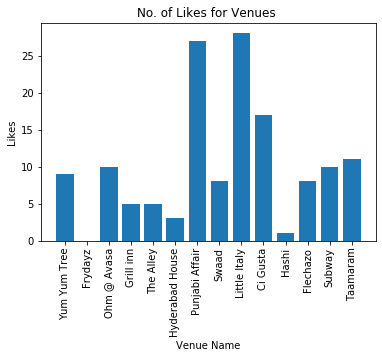

In [82]:
import matplotlib.pyplot as plt
x = df_prem['venue_name']
y = df_prem['Likes']
plt.bar(x,y)
plt.title('No. of Likes for Venues ')
plt.xlabel('Venue Name')
plt.ylabel('Likes')
plt.xticks(rotation=90)

plt.savefig('Tip Count.png')
#plt.xticks([i + 0.5 for i, _ in enumerate(locations_merged['name'])], locations_merged['name'])
plt.show()

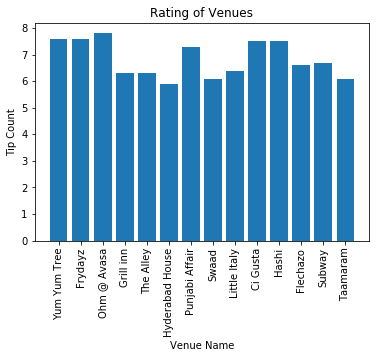

In [83]:
import matplotlib.pyplot as plt
x = df_prem['venue_name']
y = df_prem['rating']
plt.bar(x,y)
plt.title('Rating of Venues')
plt.xlabel('Venue Name')
plt.ylabel('Tip Count')
plt.xticks(rotation=90)

plt.savefig('Tip Count.png')
#plt.xticks([i + 0.5 for i, _ in enumerate(locations_merged['name'])], locations_merged['name'])
plt.show()

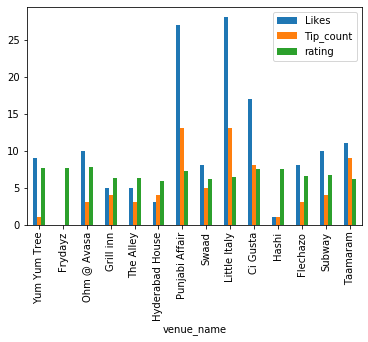

In [84]:
df_prem.plot(x="venue_name", y=["Likes", "Tip_count", "rating"], kind="bar")

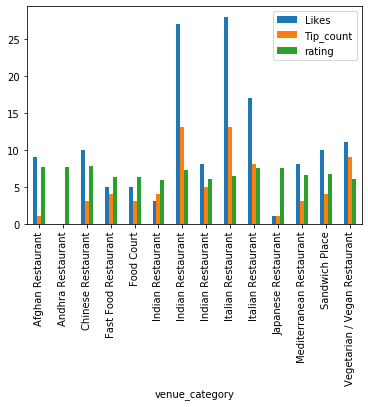

In [85]:
df_prem.plot(x="venue_category", y=["Likes", "Tip_count", "rating"], kind="bar")

### Generate word clouds for the venue categories and venues

In [86]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [87]:
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


#### The venues names from first three common venues were combined to prepare the Word Cloud

In [88]:
# download file and save as alice_novel.txt
!wget --quiet labs/DP0701EN/First Common Venue.txt

In [89]:
# open the file and read it into a variable alice_novel
FCV = open('First Common Venue.txt', 'r').read()
print ('File downloaded and saved!')

File downloaded and saved!


In [90]:
stopwords = set(STOPWORDS)

In [91]:
FCV_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
FCV_wc.generate(FCV)

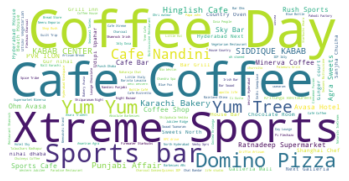

In [92]:
# display the word cloud
plt.imshow(FCV_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

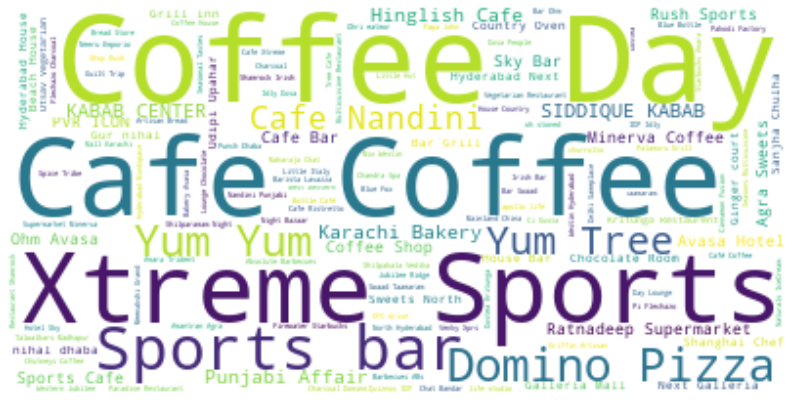

In [93]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(16) # set height

# display the cloud
plt.imshow(FCV_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Cluster 1

In [94]:
locations_merged.loc[locations_merged['Cluster Labels'] == 0, locations_merged.columns[[1] + list(range(5, locations_merged.shape[1]))]]

,name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,TCS parking,0.0,Indian Restaurant,Café,Asian Restaurant,Italian Restaurant,Hotel,Furniture / Home Store,Sandwich Place,Lounge,Pizza Place,Ice Cream Shop
5,Quality walls,0.0,Café,Indian Restaurant,Asian Restaurant,Hotel,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Dumpling Restaurant
6,Starbucks,0.0,Café,Indian Restaurant,Asian Restaurant,Hotel,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Dumpling Restaurant
7,Cafe Coffee Day,0.0,Café,Indian Restaurant,Hotel,Lounge,Italian Restaurant,Clothing Store,Ice Cream Shop,Gym,Pizza Place,Coffee Shop
9,Dunkin' Donuts,0.0,Café,Indian Restaurant,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Hotel,Asian Restaurant,Farmers Market
10,Melting pot,0.0,Café,Asian Restaurant,Indian Restaurant,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Hotel,Electronics Store
11,Thick Shake,0.0,Café,Indian Restaurant,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Hotel,Asian Restaurant,Farmers Market
15,Food Republic,0.0,Indian Restaurant,Café,Italian Restaurant,Asian Restaurant,Hotel,Coffee Shop,Restaurant,Sandwich Place,Pizza Place,Fast Food Restaurant
16,Eat Central,0.0,Café,Indian Restaurant,Sandwich Place,Lounge,Pizza Place,Italian Restaurant,Coffee Shop,Hotel,Asian Restaurant,Farmers Market
17,Reliance Fresh,0.0,Café,Indian Restaurant,Bakery,Pizza Place,Gym / Fitness Center,Fast Food Restaurant,Juice Bar,Italian Restaurant,Hotel,Wings Joint


In [95]:
x1 = locations_merged['1st Most Common Venue'].unique()

In [96]:
x1 = pd.DataFrame(x1)
x1

,0
0,Asian Restaurant
1,Indian Restaurant
2,Café
3,Lounge
4,Hotel
5,Farmers Market
6,Fast Food Restaurant
7,Restaurant
8,South Indian Restaurant
9,Multiplex


In [97]:
x1.columns = ['venue1']
x1

,venue1
0,Asian Restaurant
1,Indian Restaurant
2,Café
3,Lounge
4,Hotel
5,Farmers Market
6,Fast Food Restaurant
7,Restaurant
8,South Indian Restaurant
9,Multiplex


In [98]:
first = locations_merged['1st Most Common Venue'].value_counts().sort_values(ascending=True)    
first

Asian Restaurant             1
Restaurant                   1
Multiplex                    1
Hotel                        1
Bakery                       2
Lounge                       2
Food Court                   2
South Indian Restaurant      2
Recreation Center            2
Farmers Market               4
Fast Food Restaurant         7
Wings Joint                 13
Café                        76
Indian Restaurant          106
Name: 1st Most Common Venue, dtype: int64

In [99]:
second = locations_merged['2nd Most Common Venue'].value_counts()
second

Indian Restaurant          74
Café                       48
Fast Food Restaurant       27
Asian Restaurant           19
Bakery                     10
Andhra Restaurant           7
Chinese Restaurant          7
Breakfast Spot              7
Hotel                       7
Coffee Shop                 3
South Indian Restaurant     2
Tennis Court                1
Lounge                      1
Italian Restaurant          1
Punjabi Restaurant          1
Restaurant                  1
Furniture / Home Store      1
Office                      1
Athletics & Sports          1
Fried Chicken Joint         1
Name: 2nd Most Common Venue, dtype: int64

In [100]:
third = locations_merged['3rd Most Common Venue'].value_counts()
third

Chinese Restaurant                41
Bakery                            33
Asian Restaurant                  22
Hotel                             17
Fast Food Restaurant              12
Snack Place                       11
Café                              11
Indian Restaurant                 11
Sandwich Place                    10
Restaurant                        10
Coffee Shop                       10
Sports Bar                         5
Italian Restaurant                 4
Punjabi Restaurant                 4
Afghan Restaurant                  4
Lounge                             3
Multicuisine Indian Restaurant     3
Ice Cream Shop                     2
Recreation Center                  2
Mediterranean Restaurant           1
Wings Joint                        1
Fried Chicken Joint                1
Diner                              1
Pizza Place                        1
Name: 3rd Most Common Venue, dtype: int64

#### Cluster 2

In [101]:
locations_merged.loc[locations_merged['Cluster Labels'] == 1, locations_merged.columns[[1] + list(range(5, locations_merged.shape[1]))]]

,name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
201,Charcoal BBQ,1.0,Bakery,Tennis Court,Snack Place,Yoga Studio,Dumpling Restaurant,Comfort Food Restaurant,Concert Hall,Dance Studio,Department Store,Dessert Shop
202,Dostea,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
203,Innovate Medical Center,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
206,Kitchenz&Wardrobes,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
207,Kritunga,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
208,Wingster,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
212,STR8UP,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
213,Annapurna Tiffens,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
214,Taaza Kitchen,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop
215,Annapurna Food court,1.0,Wings Joint,Bakery,Snack Place,Restaurant,Yoga Studio,Electronics Store,Concert Hall,Dance Studio,Department Store,Dessert Shop


#### Cluster 3

In [102]:
locations_merged.loc[locations_merged['Cluster Labels'] == 2, locations_merged.columns[[1] + list(range(5, locations_merged.shape[1]))]]

,name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Domino's Pizza,2.0,Indian Restaurant,Café,Hotel,Restaurant,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Sandwich Place
8,State Bank of India,2.0,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Restaurant,Coffee Shop,Café,Hotel,Asian Restaurant,Chinese Restaurant,Italian Restaurant
13,Indian Oil,2.0,Indian Restaurant,Coffee Shop,Café,Pizza Place,Restaurant,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Italian Restaurant,Burger Joint
14,Telahu,2.0,Indian Restaurant,Restaurant,Café,Coffee Shop,Italian Restaurant,Hotel,Asian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Lounge
109,State Bank of India,2.0,Indian Restaurant,Fast Food Restaurant,Sandwich Place,Restaurant,Coffee Shop,Café,Hotel,Asian Restaurant,Chinese Restaurant,Italian Restaurant
147,MAXCURE SUYOSHA WOMAN & CHILD HOSPITAL,2.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Hotel,Asian Restaurant,Italian Restaurant,Café,Sandwich Place,Restaurant,Middle Eastern Restaurant
148,Cyber Gateway,2.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Hotel,Italian Restaurant,Café,Sandwich Place,Restaurant,Office,Middle Eastern Restaurant
149,Aviyal Veg Restaurant,2.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Hotel,Asian Restaurant,Italian Restaurant,Café,Sandwich Place,Restaurant,Middle Eastern Restaurant
150,Bahar café,2.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Hotel,Italian Restaurant,Café,Sandwich Place,Restaurant,Middle Eastern Restaurant,Pub
151,Ibis Hotel,2.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,Restaurant,Middle Eastern Restaurant,Pizza Place,Hotel,Concert Hall


#### Cluster 4

In [103]:
locations_merged.loc[locations_merged['Cluster Labels'] == 3, locations_merged.columns[[1] + list(range(5, locations_merged.shape[1]))]]

,name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,IKEA,3.0,Asian Restaurant,Furniture / Home Store,Hotel,Café,Indian Restaurant,Yoga Studio,Dumpling Restaurant,Dance Studio,Department Store,Dessert Shop
1,Hexagon,3.0,Indian Restaurant,Café,Asian Restaurant,Bakery,Clothing Store,Hotel,Coffee Shop,Office,Ice Cream Shop,IT Services
2,Mindspace,3.0,Indian Restaurant,Asian Restaurant,Café,Pizza Place,Coffee Shop,Gym,Furniture / Home Store,Lounge,Hotel,Sandwich Place
29,Apollo Pharmacy,3.0,Indian Restaurant,Café,Chinese Restaurant,Bakery,Asian Restaurant,Afghan Restaurant,Sandwich Place,BBQ Joint,Fast Food Restaurant,Andhra Restaurant
65,pharmacy,3.0,Indian Restaurant,Asian Restaurant,Afghan Restaurant,Dessert Shop,Multicuisine Indian Restaurant,BBQ Joint,Bakery,Bar,Fast Food Restaurant,Sandwich Place
66,Vikram Hospitals,3.0,Indian Restaurant,Asian Restaurant,Afghan Restaurant,Dessert Shop,Multicuisine Indian Restaurant,BBQ Joint,Bakery,Bar,Fast Food Restaurant,Sandwich Place
67,Hotel Trishul Grand,3.0,Indian Restaurant,Asian Restaurant,Afghan Restaurant,Sandwich Place,Japanese Restaurant,Multicuisine Indian Restaurant,Italian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant
68,Andhra Bank,3.0,Indian Restaurant,Café,Asian Restaurant,Multicuisine Indian Restaurant,Sandwich Place,Chinese Restaurant,Breakfast Spot,Italian Restaurant,Hookah Bar,Snack Place
69,swimming_pool,3.0,Indian Restaurant,Café,Asian Restaurant,Multicuisine Indian Restaurant,Department Store,Japanese Restaurant,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Hookah Bar
70,Hideout,3.0,Indian Restaurant,Café,Asian Restaurant,Multicuisine Indian Restaurant,Breakfast Spot,Dessert Shop,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,Ice Cream Shop


#### Cluster 5

In [104]:
locations_merged.loc[locations_merged['Cluster Labels'] == 4, locations_merged.columns[[1] + list(range(5, locations_merged.shape[1]))]]

,name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
189,Freak Shake,4.0,South Indian Restaurant,Indian Restaurant,Punjabi Restaurant,Recreation Center,Chinese Restaurant,Concert Hall,Market,Lounge,Athletics & Sports,Sports Bar
190,Puff House,4.0,South Indian Restaurant,Indian Restaurant,Punjabi Restaurant,Recreation Center,Chinese Restaurant,Concert Hall,Market,Lounge,Athletics & Sports,Sports Bar
191,Tata Motors,4.0,Indian Restaurant,South Indian Restaurant,Punjabi Restaurant,Andhra Restaurant,Chinese Restaurant,Lounge,Sports Bar,Athletics & Sports,Recreation Center,Yoga Studio
192,Palamuri Grill,4.0,Indian Restaurant,Punjabi Restaurant,Lounge,Andhra Restaurant,Sports Bar,Athletics & Sports,South Indian Restaurant,Multiplex,Recreation Center,Dessert Shop
193,Urban Vilage,4.0,Multiplex,Andhra Restaurant,Sports Bar,Athletics & Sports,Indian Restaurant,Recreation Center,Dumpling Restaurant,Comfort Food Restaurant,Concert Hall,Dance Studio
194,Carz,4.0,Indian Restaurant,Andhra Restaurant,Sports Bar,Athletics & Sports,Restaurant,Recreation Center,Yoga Studio,Concert Hall,Dance Studio,Department Store
195,Ahilobhilam Foods,4.0,Indian Restaurant,South Indian Restaurant,Punjabi Restaurant,Andhra Restaurant,Chinese Restaurant,Sports Bar,Athletics & Sports,Recreation Center,Yoga Studio,Concert Hall
196,ICarz,4.0,Indian Restaurant,Andhra Restaurant,Sports Bar,Athletics & Sports,South Indian Restaurant,Food Court,Recreation Center,Punjabi Restaurant,Yoga Studio,Concert Hall
211,IDEA Clinics,4.0,Indian Restaurant,Athletics & Sports,Bakery,Snack Place,Restaurant,Recreation Center,Yoga Studio,Concert Hall,Dance Studio,Department Store
217,Petrol bunk,4.0,Recreation Center,Andhra Restaurant,Sports Bar,Athletics & Sports,Food Court,Yoga Studio,Concert Hall,Dance Studio,Department Store,Dessert Shop
